# 分水岭图像分割

In [26]:
import numpy as np
%matplotlib  inline
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt

In [30]:
img = cv2.cvtColor(cv2.imread('../datas/scenery.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/scenery.jpg',0)

In [35]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)


# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)


# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)


# Finding unknown region
sure_fg = np.clip(sure_fg,0,255)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)


# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)

img[markers == -1] = [0,255,0]
dst = np.zeros_like(img)
dst[markers == -1] = (255,0,0)
dst = cv2.GaussianBlur(dst,(11,11),1.5,1.5)

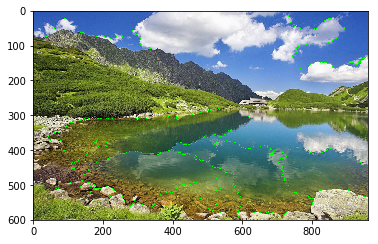

In [32]:
plt.imshow(img)

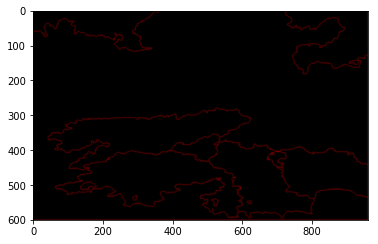

In [36]:
plt.imshow(dst)

In [42]:
dr = dst[:,:,0]
img[dr > 0] = [0,255,0]

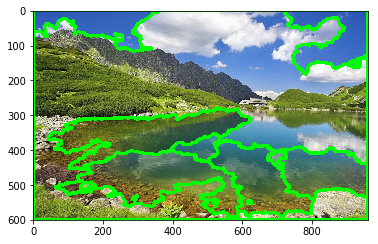

In [43]:
plt.imshow(img)